# gym-swarm
# Author: Robert Tjarko Lange
## A simple test installation of the environment

In [1]:
# Install the environment from the command line
!pip install -e .

Obtaining file:///Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm
  Found existing installation: gym-swarm 0.0.1
    Uninstalling gym-swarm-0.0.1:
      Successfully uninstalled gym-swarm-0.0.1
  Running setup.py develop for gym-swarm


In [2]:
# Run unit tests
!python gym_swarm/tests/test.py

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm/gym_swarm/envs/swarm_env.py:19: ResourceWarning: unclosed file <_io.BufferedReader name='

In [3]:
# Import the environment
import gym
import gym_swarm

# Import base modules
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make the environment and change the base params
num_agents = 10
obs_space_size=10

env = gym.make("Swarm-v0")
env.set_env_parameters(num_agents, obs_space_size, verbose=True)
state = env.reset()

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Swarm Environment Parameters have been set to:
	 Number of Agents: 10
	 State Space: 10x10 Grid


In [5]:
class RandomAgents():
    """
    Class for simple random agents
    """
    def __init__(self, env):
        self.num_actions = env.action_space.n
        self.num_agents = env.num_agents

    def random_action(self):
        random_actions = np.random.randint(8, size=self.num_agents)
        return dict(enumerate(random_actions))

In [6]:
random_agent = RandomAgents(env)
max_steps = 10

Step 1


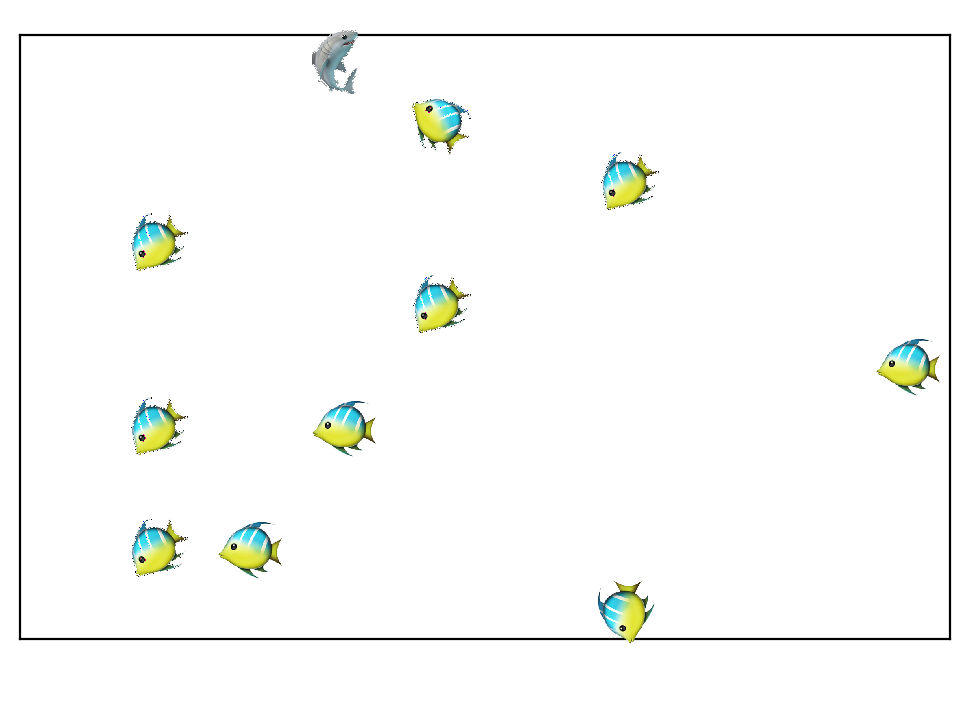

Step 2


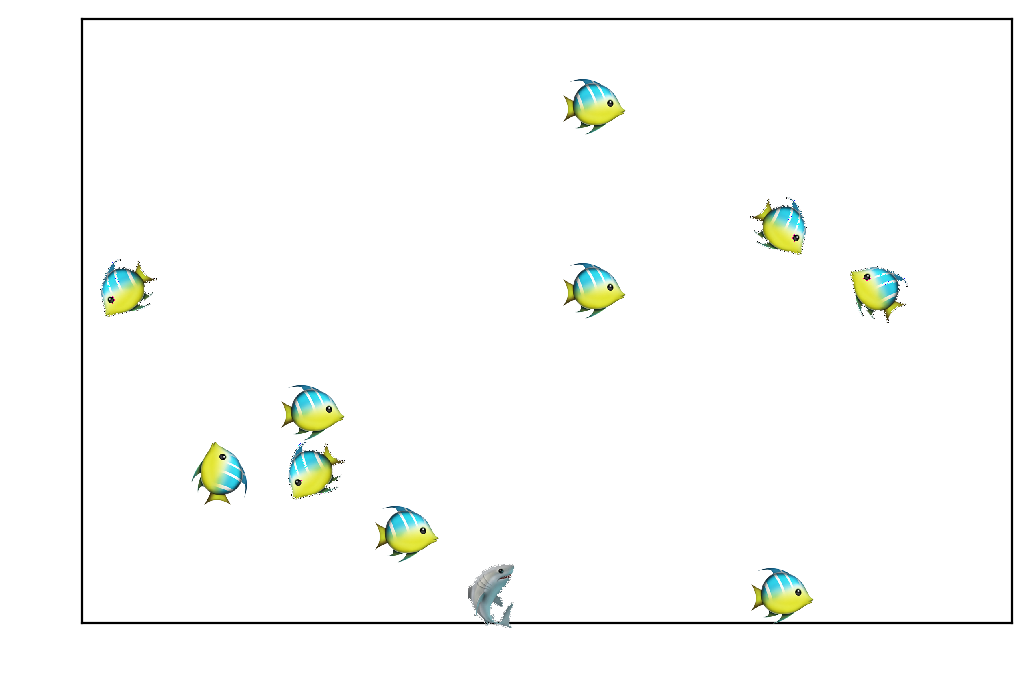

Step 3


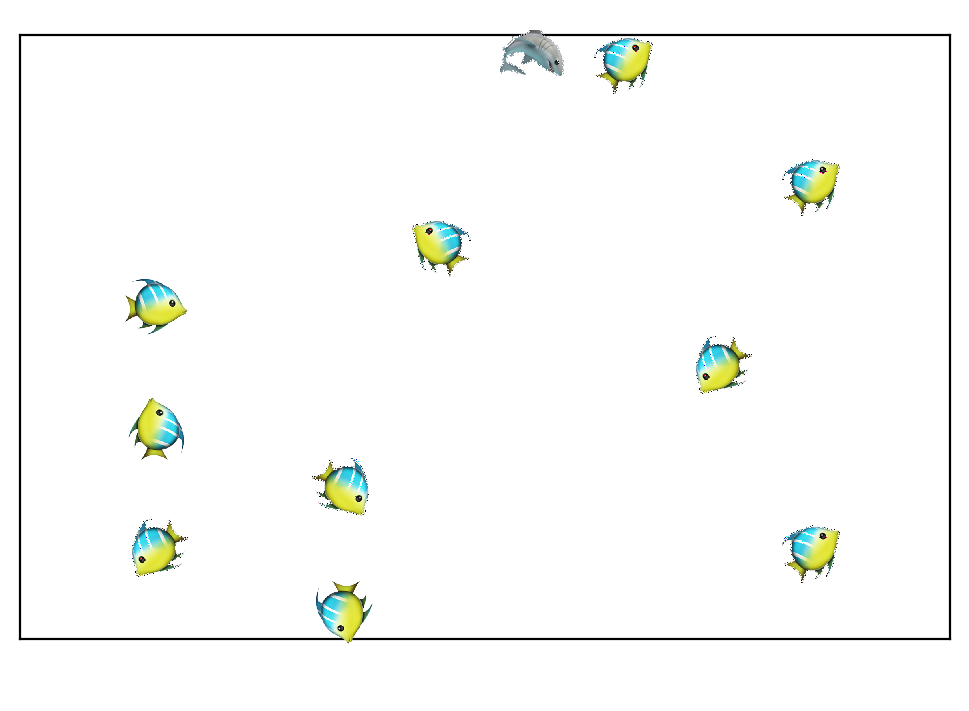

Step 4


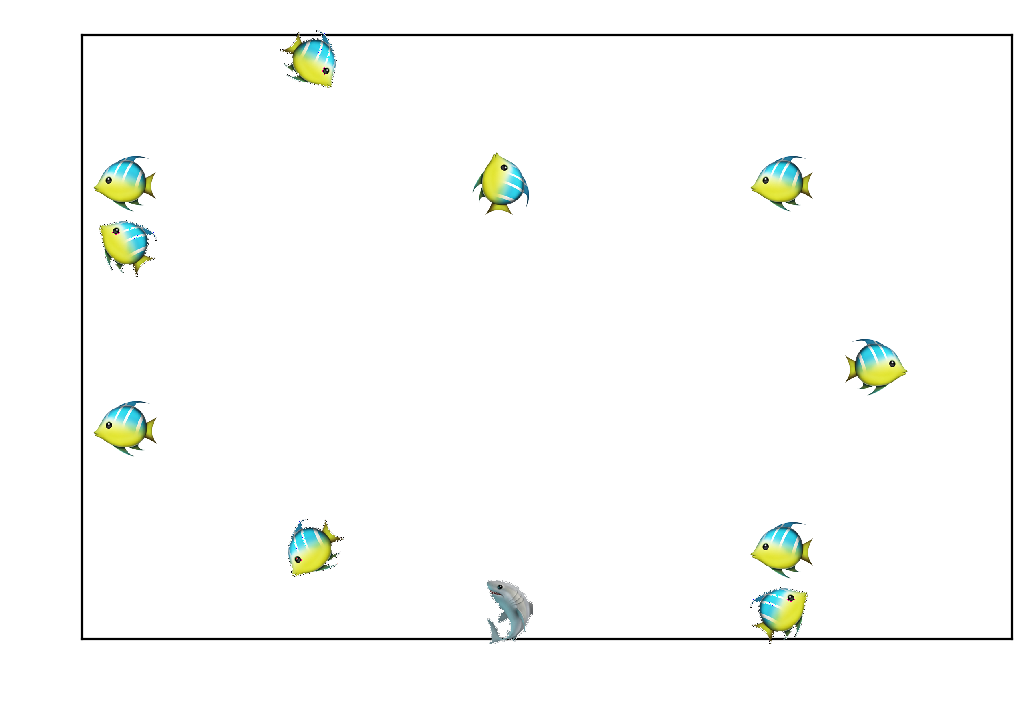

Step 5


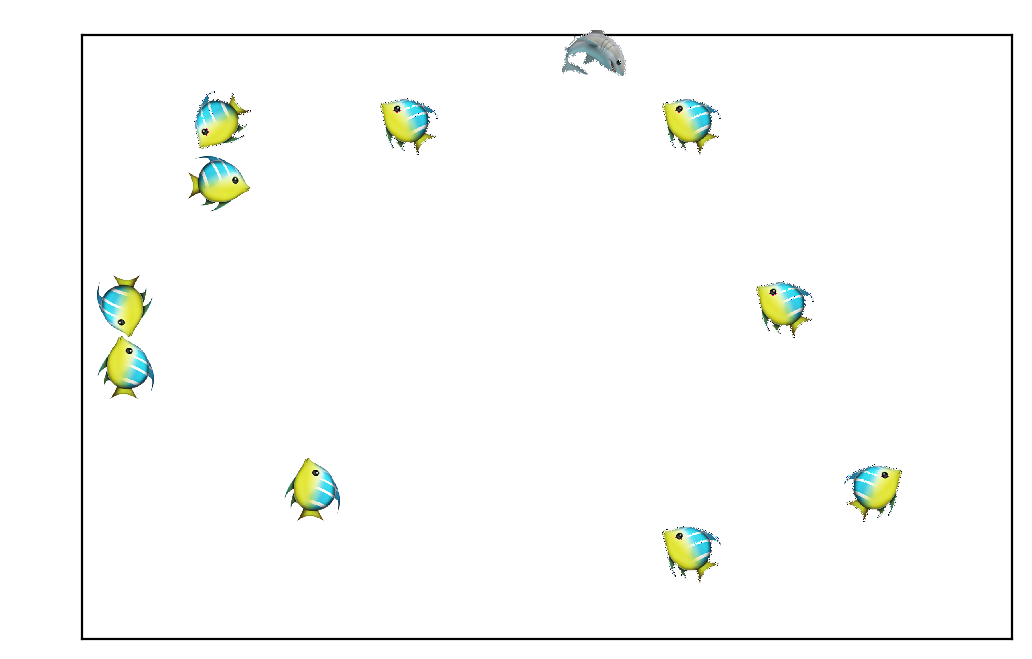

Step 6


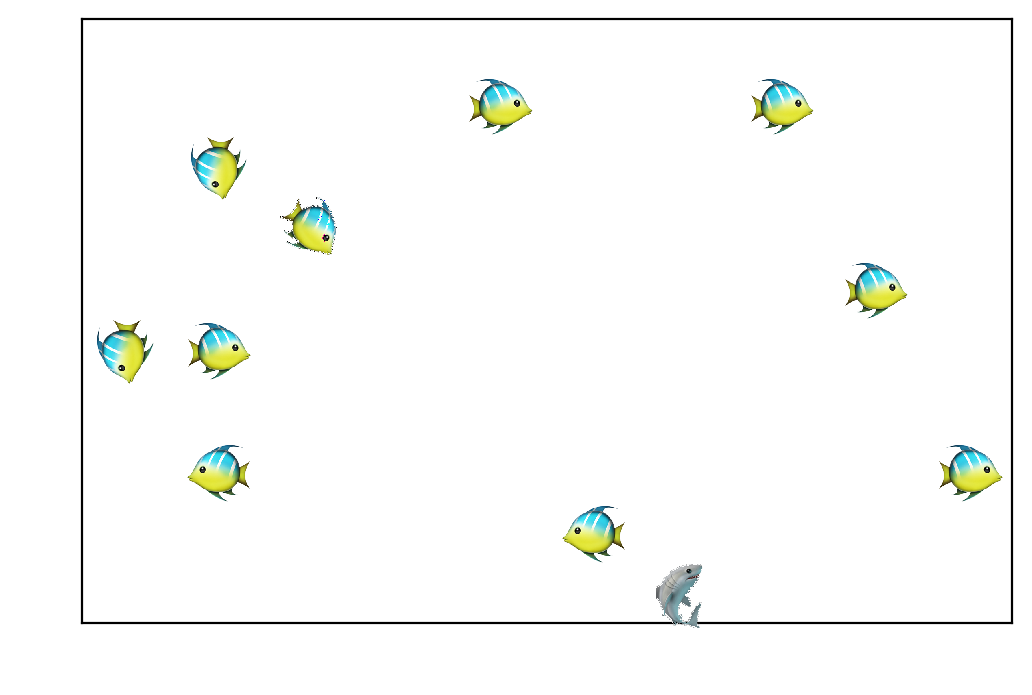

Step 7


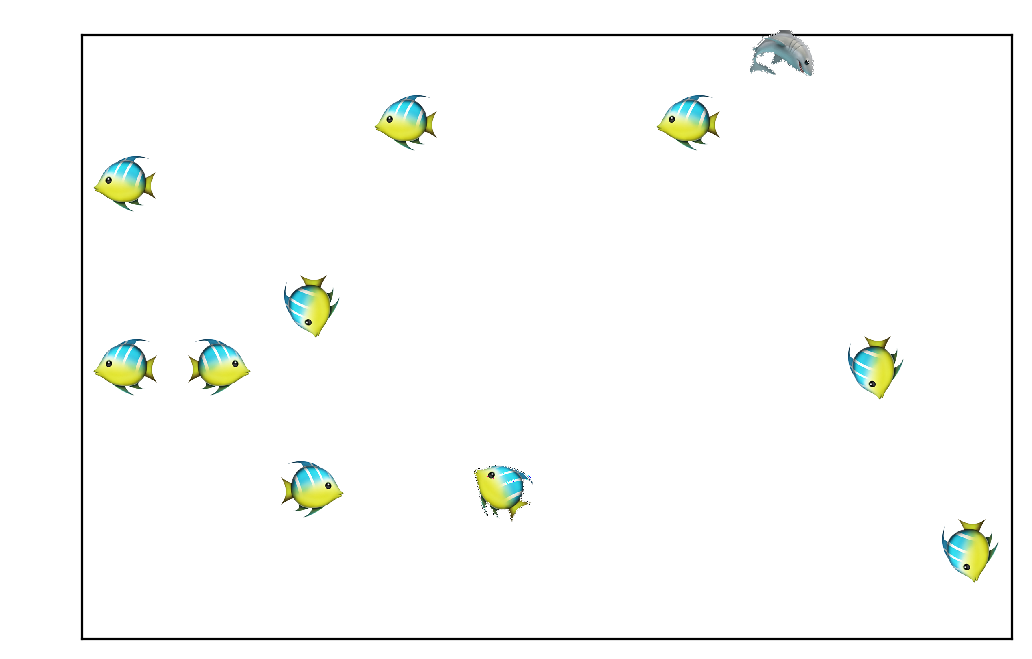

Step 8


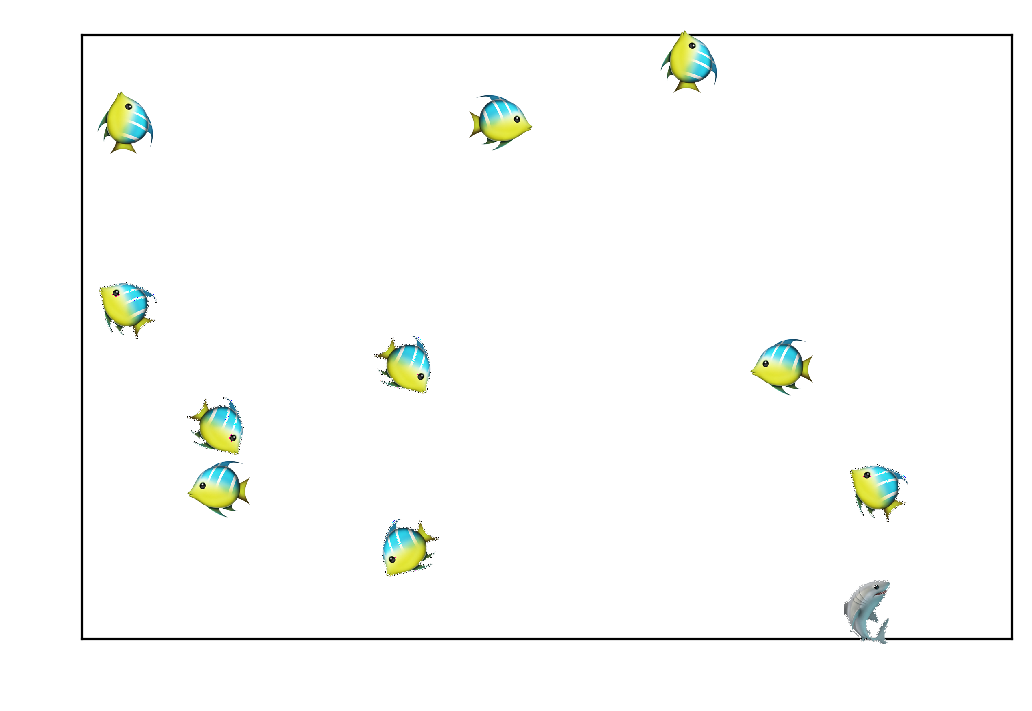

Step 9


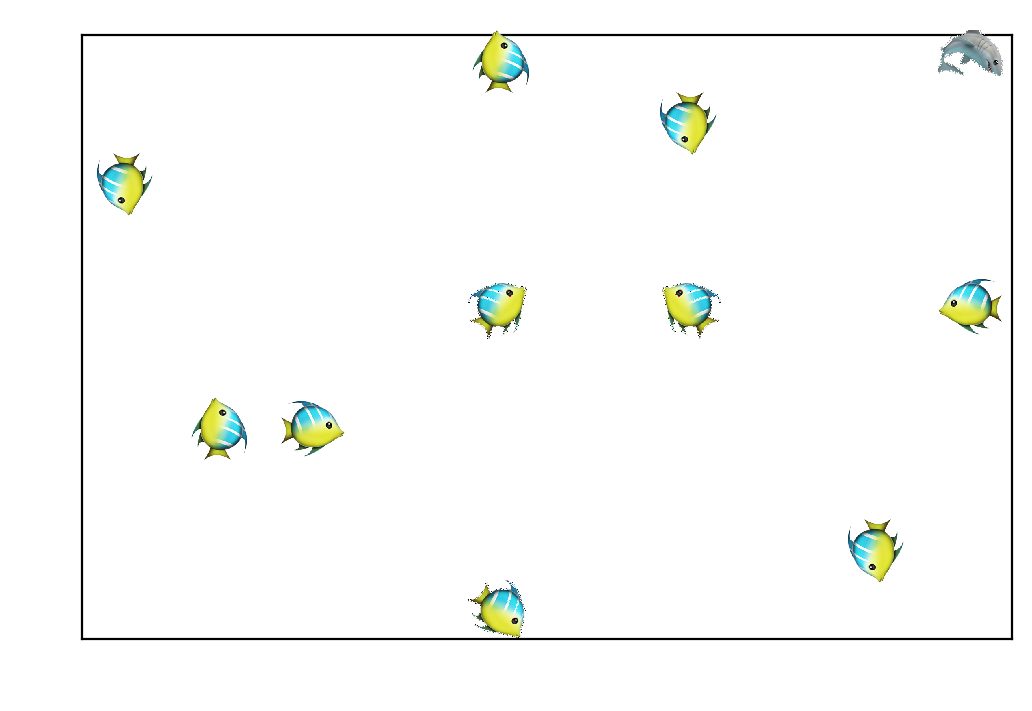

Step 10


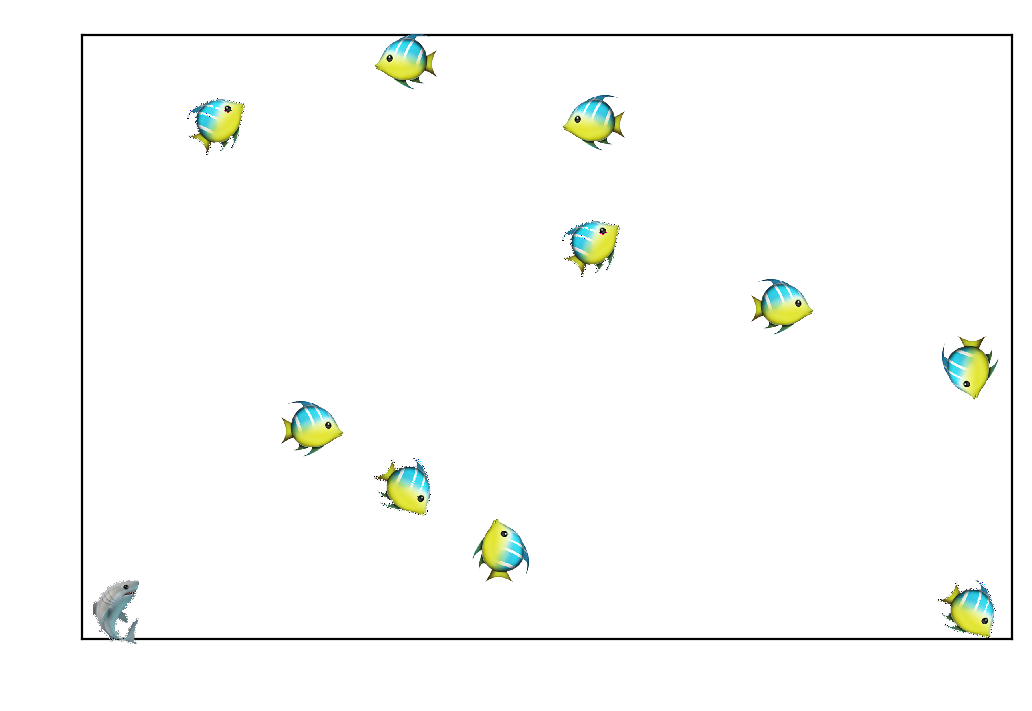

In [7]:
# Run a few steps with the random agent
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    print("Step {}".format(i + 1))
    env.render()
    if done:
        break

In [8]:
env = gym.make("Swarm-v0")

agents_list = np.arange(5, 500, 50).tolist()
num_runs = 5

mean_init_time = np.zeros((len(agents_list)))
sd_init_time = np.zeros((len(agents_list)))

mean_exec_time = np.zeros((len(agents_list)))
sd_exec_time = np.zeros((len(agents_list)))

for i, n_agents in enumerate(agents_list):
    init_time_temp = []
    exec_time_temp = []
    
    for run in range(num_runs):
        start = time.time()
        env.set_env_parameters(num_agents=n_agents,
                               obs_space_size=10000,
                               verbose=False)
        state = env.reset()
        total_init = time.time() - start
        init_time_temp.append(total_init)

        random_agent = RandomAgents(env)
        action = random_agent.random_action()

        start = time.time()
        next_state, reward, done, _ = env.step(action)
        total_exec = time.time() - start
        exec_time_temp.append(total_exec)
    
    mean_init_time[i] = np.array(init_time_temp).mean()
    sd_init_time[i] = np.array(init_time_temp).std()

    mean_exec_time[i] = np.array(exec_time_temp).mean()
    sd_exec_time[i] = np.array(exec_time_temp).std()


/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


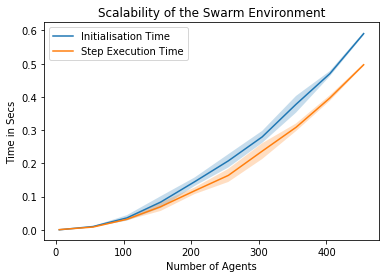

In [9]:
plt.plot(agents_list, mean_init_time, label="Initialisation Time")
plt.fill_between(agents_list,
                 mean_init_time - 2*sd_init_time,
                 mean_init_time + 2*sd_init_time,
                 alpha=0.25)

plt.plot(agents_list, mean_exec_time, label="Step Execution Time")
plt.fill_between(agents_list,
                 mean_exec_time - 2*sd_exec_time,
                 mean_exec_time + 2*sd_exec_time,
                 alpha=0.25)

plt.xlabel("Number of Agents")
plt.ylabel("Time in Secs")
plt.title("Scalability of the Swarm Environment")
plt.legend(loc=2)

plt.savefig("gym_swarm/images/scalability.png", dpi=300)